# DA-DTW - Deep Approximations of Dynamic Time Warping

## Abstract

The use of Dynamic Time Warping (DTW) as a measure between time series allows for misalignment in phase or local distortion and is of fundamental importance in a variety of time series data mining and querying tasks. The utility of DTW is undeniable, and a large suite of literature has focused on avoiding or accelerating its quadratic time complexity. Other work has extended DTW to measure multivariate time series - most real-world applications of time series are of the multivariate type -  implemented DTW kernels into the layers of neural networks and used variants of DTW as a loss function. This work uses deep, convolutional neural networks to maintain the temporal relationships present in time series data and approximate DTW. We show a 100x efficiency improvement over current state-of-the-art methods for querying time series databases. 

## Introduction

### Dynamic Time Warping

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def dynamic_time_warping(arr1, arr2):

    n,m = len(arr1), len(arr2)
    dp = np.ones((n + 1, m + 1))*np.inf
    dp[0][0] = 0

    for i in range(1, n + 1):

        for j in range(1, m + 1):

            acc = min(dp[i - 1][j], dp[i][j - 1], dp[i - 1][j - 1])
            cost = (arr1[i - 1] - arr2[j - 1])**2
            dp[i][j] = cost + acc

    return dp[n][m]**0.5, dp


a = np.sin(np.linspace(0, 10, 100)) + np.random.normal(0, 0.01, 100)
b = np.sin(np.linspace(1, 11, 100)) + np.random.normal(0, 0.01, 100)

score, mat = dynamic_time_warping(a, b)

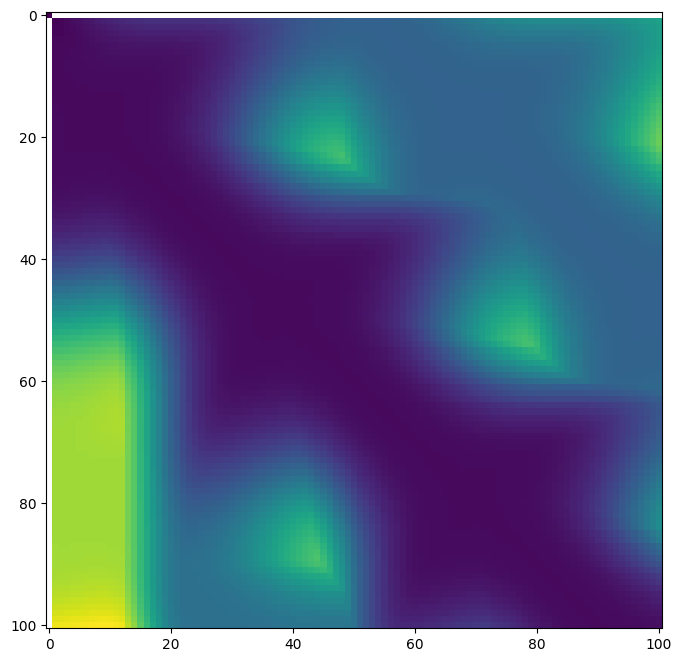

In [26]:
plt.figure(figsize = (12,8))
plt.imshow(mat);

### The Querying Task